## Problem Set 4 
## Yuming Liu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.integrate import quad
import scipy.optimize as opt
import warnings
warnings.filterwarnings("ignore")

### Problem 1(a)

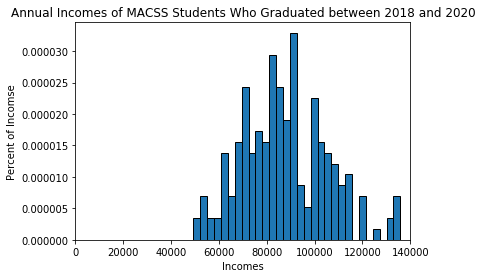

In [2]:
pts = np.loadtxt('data/incomes.txt')

num_bins = 30
count, bins, ignored = plt.hist(pts, num_bins, density=True, edgecolor='k')
plt.title('Annual Incomes of MACSS Students Who Graduated between 2018 and 2020') 
plt.xlabel(r'Incomes')
plt.ylabel(r'Percent of Incomse')
plt.xlim([0, 140000])
plt.show()

### Problem 1(b) 

In [3]:
def trunc_lognorm_pdf(xvals, mu, sigma, cut_lb, cut_ub):
    if cut_ub == 'None' and cut_lb == 'None':
        prob_notcut = 1.0
    elif cut_ub == 'None' and cut_lb != 'None':
        prob_notcut = 1.0 - sts.lognorm.cdf(cut_lb, scale=np.exp(mu), s=sigma)
    elif cut_ub != 'None' and cut_lb == 'None':
        prob_notcut = sts.lognorm.cdf(cut_ub, scale=np.exp(mu), s=sigma)
    elif cut_ub != 'None' and cut_lb != 'None':
        prob_notcut = (sts.lognorm.cdf(cut_ub, scale=np.exp(mu), s=sigma) -
                       sts.lognorm.cdf(cut_lb, scale=np.exp(mu), s=sigma))
            
    pdf_vals    = ((1/(xvals*sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (np.log(xvals) - mu)**2 / (2 * sigma**2))) /
                    prob_notcut)
    
    return pdf_vals

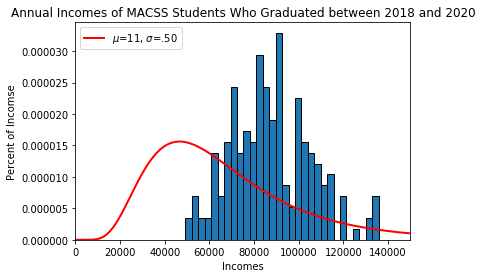

In [4]:
plt.hist(pts, num_bins, density=True, edgecolor='k')
plt.title('Annual Incomes of MACSS Students Who Graduated between 2018 and 2020') 
plt.xlabel(r'Incomes')
plt.ylabel(r'Percent of Incomse')
plt.xlim([0, 150000])

dist_pts = np.linspace(0.001, 150000, 1000)
mu_1 = 11
sig_1 = 0.5

plt.plot(dist_pts, trunc_lognorm_pdf(dist_pts, mu_1, sig_1, 1, 150000),
         linewidth=2, color='r', label='$\mu$=11, $\sigma$=.50')
plt.legend(loc='upper left')

plt.show()

In [5]:
def log_lik_truncnorm(xvals, mu, sigma, cut_lb, cut_ub):
    pdf_vals = trunc_lognorm_pdf(xvals, mu, sigma, cut_lb, cut_ub)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

print('Log-likelihood :', log_lik_truncnorm(pts, mu_1, sig_1, 1, 150000))

Log-likelihood : -2379.120591931827


### Problem 1(c)

In [6]:
def crit(params, *args):
    mu, sigma = params
    xvals, cut_lb, cut_ub = args
    log_lik_val = log_lik_truncnorm(xvals, mu, abs(sigma), cut_lb, cut_ub)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [7]:
mu_init = 11
sig_init = 0.5
params_init = np.array([mu_init, sig_init])
mle_args = (pts, 0, 150000)
results_uncstr = opt.minimize(crit, params_init, args=(mle_args))
mu_MLE, sig_MLE = results_uncstr.x
MLE = log_lik_truncnorm(pts, mu_MLE, sig_MLE, 0, 150000)
print('mu_MLE=', mu_MLE, ' sig_MLE=', sig_MLE)
print('value of likelihood function is', MLE)
print('The Hessian matrix is', results_uncstr.hess_inv)

mu_MLE= 11.361699976140056  sig_MLE= 0.21174326472241192
value of likelihood function is -2240.934337511636
The Hessian matrix is [[0.00032821 0.00066662]
 [0.00066662 0.00147221]]


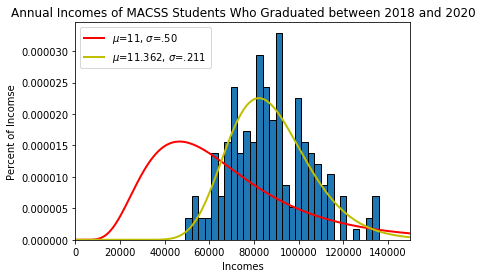

In [8]:
plt.hist(pts, num_bins, density=True, edgecolor='k')
plt.title('Annual Incomes of MACSS Students Who Graduated between 2018 and 2020') 
plt.xlabel(r'Incomes')
plt.ylabel(r'Percent of Incomse')
plt.xlim([0, 150000])

dist_pts = np.linspace(0.001, 150000, 1000)
mu_1 = 11
sig_1 = 0.5

plt.plot(dist_pts, trunc_lognorm_pdf(dist_pts, mu_1, sig_1, 1, 150000),
         linewidth=2, color='r', label='$\mu$=11, $\sigma$=.50')
plt.legend(loc='upper left')

plt.plot(dist_pts, trunc_lognorm_pdf(dist_pts, mu_MLE, sig_MLE, 1, 150000),
         linewidth=2, color='y', label='$\mu$=11.362, $\sigma$=.211')
plt.legend(loc='upper left')

plt.show()

### Problem 1(d)

In [9]:
mu_new, sig_new = np.array([11, 0.5])
print(mu_new, sig_new)
print(mu_MLE, sig_MLE)
log_lik_h0 = log_lik_truncnorm(pts, mu_new, sig_new, 0, 150000)
print('hypothesis value log likelihood', log_lik_h0)
log_lik_mle = log_lik_truncnorm(pts, mu_MLE, sig_MLE, 0, 150000)
print('MLE log likelihood', log_lik_mle)
LR_val = 2 * (log_lik_mle - log_lik_h0)
print('likelihood ratio value', LR_val)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

11.0 0.5
11.361699976140056 0.21174326472241192
hypothesis value log likelihood -2379.120591931827
MLE log likelihood -2240.934337511636
likelihood ratio value 276.3725088403826
chi squared of H0 with 2 degrees of freedom p-value =  0.0


Since the p-value is extremely small, we reject the null hypothesis and conclude that the data has a different distribution from 1(b).

### Problem 1(e)

In [10]:
m100k = 1-sts.lognorm.cdf(100000, scale=np.exp(mu_MLE), s=sig_MLE)
l75k = sts.lognorm.cdf(75000, scale=np.exp(mu_MLE), s=sig_MLE)
print('The probability of earning more than 100k is ', m100k)
print('The probability of earning less than 75k is ', l75k)

The probability of earning more than 100k is  0.23755402258976566
The probability of earning less than 75k is  0.2596439222572218


### Problem 2(a)

In [11]:
data = pd.read_csv('data/sick.txt')

In [12]:
data.head()

,sick,age,children,avgtemp_winter
0,1.67,57.47,3.04,54.10
1,0.71,26.77,1.20,36.54
2,1.39,41.85,2.31,32.38
3,1.37,51.27,2.46,52.94
4,1.45,44.22,2.72,45.90


In [13]:
def norm_pdf(xvals, sigma):
    sigma = abs(sigma)
    pdf_vals = (1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (xvals)**2 / (2 * sigma**2))) 
    return pdf_vals

def log_lik(y, x1, x2, x3, beta_0,
            beta_1, beta_2, beta_3, sigma):
    epsilon = y - beta_0 - beta_1 * x1 - beta_2 * x2 - beta_3 * x3
    pdf_vals = norm_pdf(epsilon, sigma)
    log_lik_func = np.log(pdf_vals).sum()
    
    return log_lik_func

def crit_lr(params, *args):
    beta_0, beta_1, beta_2, beta_3, sigma = params
    y, x1, x2, x3 = args
    neg_log_lik = -log_lik(y, x1, x2, x3, beta_0,
                           beta_1, beta_2, beta_3, sigma)
    return neg_log_lik

In [14]:
params_init = np.array([1, 0, 0, 0, (0.01 ** 0.5)])
mle_args = data
y = data['sick']
x1, x2, x3 = data['age'], data['children'], data['avgtemp_winter']

results = opt.minimize(crit_lr, params_init, args = (y, x1, x2, x3))
b0, b1, b2, b3, sigma = results.x
print('beta_0 = ', b0)
print('beta_1 = ', b1)
print('beta2 = ', b2)
print('beta3 = ', b3)
print('sigma = ', sigma)
print('The value of the log likelihood function is: ', abs(results.fun))
print('The estimated variance covariance matrix of the estimates is: ', results.hess_inv)

beta_0 =  0.25164638358979413
beta_1 =  0.01293335004243094
beta2 =  0.40050204832986624
beta3 =  -0.009991673034136558
sigma =  0.0030176821762459183
The value of the log likelihood function is:  876.8650462887076
The estimated variance covariance matrix of the estimates is:  [[ 9.28952977e-07 -2.59333953e-09 -6.03075470e-08 -1.51766333e-08
  -5.81786380e-09]
 [-2.59333953e-09  2.62444545e-09 -2.14991777e-08 -1.55480976e-09
  -1.64135303e-10]
 [-6.03075470e-08 -2.14991777e-08  2.19103324e-07  1.29390796e-08
   3.28714537e-09]
 [-1.51766333e-08 -1.55480976e-09  1.29390796e-08  1.28927814e-09
   1.58273297e-10]
 [-5.81786380e-09 -1.64135303e-10  3.28714537e-09  1.58273297e-10
   2.21354184e-08]]


### Problem 2(b)

In [15]:
b00, b01, b02, b03, sigma0 = np.array([1, 0, 0, 0, 0.1])
log_lik_h0 = log_lik(y, x1, x2, x3, b00, b01, b02, b03, sigma0)
print('hypothesis value log likelihood', log_lik_h0)
log_lik_mle = log_lik(y, x1, x2, x3, b0, b1, b2, b3, sigma)
print('MLE log likelihood', log_lik_mle)
LR_val = 2 * (log_lik_mle - log_lik_h0)
print('likelihood ratio value', LR_val)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

hypothesis value log likelihood -2253.700688042125
MLE log likelihood 876.8650462887076
likelihood ratio value 6261.131468661665
chi squared of H0 with 2 degrees of freedom p-value =  0.0


Therefore, since the p-vale is extremely small, we reject H0 and conclude that age,
number of children, and average winter temperature have effect on the
number of sick days.